<a href="https://colab.research.google.com/github/sarth-04/DDOS/blob/main/Desicion_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

<ipython-input-1-a55ea3d18e69>:5: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


In [ ]:
import sys
import sklearn
print('Dimensions of the  dataset:',df.shape)

df.info()

Dimensions of the  dataset: (225745, 85)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flow ID                       98 non-null     object 
 1    Source IP                    98 non-null     object 
 2    Source Port                  98 non-null     float64
 3    Destination IP               98 non-null     object 
 4    Destination Port             98 non-null     float64
 5    Protocol                     98 non-null     float64
 6    Timestamp                    98 non-null     object 
 7    Flow Duration                98 non-null     float64
 8    Total Fwd Packets            98 non-null     float64
 9    Total Backward Packets       98 non-null     float64
 10  Total Length of Fwd Packets   98 non-null     float64
 11   Total Length of Bwd Packets  98 non-null     float64
 12   Fwd Packet Lengt

In [ ]:
dropdf= df.dropna()
dropdf.shape

(98, 85)

In [ ]:
dropdf.isna().any()[lambda x:x]

,0


In [ ]:
# Use drop method instead of del to handle potential errors more gracefully
# Also, double check the column names for any typos or extra spaces

# If you want to delete 'Flow Bytes/s'
dropdf = dropdf.drop(columns=['Flow Bytes/s'], errors='ignore')
# errors='ignore' will skip the operation if the column doesn't exist, preventing the KeyError

# If you want to delete ' Flow Packets/s' (note the leading space)
dropdf = dropdf.drop(columns=[' Flow Packets/s'], errors='ignore')
# errors='ignore' will skip the operation if the column doesn't exist, preventing the KeyError



In [ ]:
df.iloc[0]

,0
Flow ID,192.168.10.5-104.16.207.165-54865-443-6
Source IP,104.16.207.165
Source Port,443.0
Destination IP,192.168.10.5
Destination Port,54865.0
...,...
Idle Mean,0.0
Idle Std,0.0
Idle Max,0.0
Idle Min,0.0


In [ ]:

from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)

(78, 83)
(20, 83)


In [ ]:
print('Label distribution Training set:')
print(df_train[' Label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test[' Label'].value_counts())

Label distribution Training set:
 Label
BENIGN    78
Name: count, dtype: int64

Label distribution Test set:
 Label
BENIGN    20
Name: count, dtype: int64


In [ ]:
# Setting the new value

labeldf=df_train[' Label']
print(labeldf)

12    BENIGN
55    BENIGN
94    BENIGN
78    BENIGN
84    BENIGN
       ...  
79    BENIGN
80    BENIGN
35    BENIGN
3     BENIGN
20    BENIGN
Name:  Label, Length: 78, dtype: object


In [ ]:

labeldf_test=df_test[' Label']
print(labeldf_test)
#change the label column

92    BENIGN
50    BENIGN
70    BENIGN
47    BENIGN
61    BENIGN
48    BENIGN
27    BENIGN
24    BENIGN
28    BENIGN
8     BENIGN
65    BENIGN
73    BENIGN
93    BENIGN
7     BENIGN
67    BENIGN
41    BENIGN
64    BENIGN
74    BENIGN
21    BENIGN
16    BENIGN
Name:  Label, dtype: object


In [ ]:
# Setting the new value
#This code replaces 'BENIGN' with 0 and 'DDoS' with 1 in labeldf (for df_train) and stores it in newlabeldf.
newlabeldf = labeldf.replace({'BENIGN': 0, 'DDoS': 1})
#print(newlabeldf)

# ipython-input-31-2ec1f2953a93
labeldf_test = df_test[' Label']
print(labeldf_test)

# change the label column
newlabeldf_test = labeldf_test.replace({'BENIGN': 0, 'DDoS': 1})
#print(newlabeldf)

df_train[' Label'] = newlabeldf  # Use the newly defined newlabeldf
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])

92    BENIGN
50    BENIGN
70    BENIGN
47    BENIGN
61    BENIGN
48    BENIGN
27    BENIGN
24    BENIGN
28    BENIGN
8     BENIGN
65    BENIGN
73    BENIGN
93    BENIGN
7     BENIGN
67    BENIGN
41    BENIGN
64    BENIGN
74    BENIGN
21    BENIGN
16    BENIGN
Name:  Label, dtype: object


<ipython-input-12-7ff2c07ea760>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf = labeldf.replace({'BENIGN': 0, 'DDoS': 1})
<ipython-input-12-7ff2c07ea760>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test = labeldf_test.replace({'BENIGN': 0, 'DDoS': 1})


In [ ]:
X_df_train=df_train.drop(' Label', axis=1)
Y_df_train=df_train[' Label']
X_df_test=df_test.drop(' Label', axis=1)
Y_df_test=df_test[' Label']
X_df_train
Y_df_train

,Label
12,0
55,0
94,0
78,0
84,0
...,...
79,0
80,0
35,0
3,0


In [ ]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count

In [ ]:
print(X_df_train)
from sklearn import preprocessing

# Select only numerical columns from X_df_train and X_df_test
X_df_train_numeric = X_df_train.select_dtypes(include=['number'])
X_df_test_numeric = X_df_test.select_dtypes(include=['number'])

scaler1 = preprocessing.StandardScaler().fit(X_df_train_numeric)
X_df_train_scaled = scaler1.transform(X_df_train_numeric)

# test data
scaler2 = preprocessing.StandardScaler().fit(X_df_test_numeric)
X_df_test_scaled = scaler2.transform(X_df_test_numeric)

# If you need to have the scaled data back in the original DataFrames:
X_df_train[X_df_train_numeric.columns] = X_df_train_scaled
X_df_test[X_df_test_numeric.columns] = X_df_test_scaled

                                     Flow ID       Source IP   Source Port  \
12   192.168.10.5-104.97.125.160-55145-443-6  104.97.125.160         443.0   
55    172.217.6.198-192.168.10.5-443-55270-6   172.217.6.198         443.0   
94   152.163.66.165-192.168.10.16-80-60344-6   192.168.10.16       60344.0   
78  192.168.10.12-192.229.163.97-54990-443-6   192.168.10.12       54990.0   
84    172.217.3.98-192.168.10.14-443-57681-6   192.168.10.14       57681.0   
..                                       ...             ...           ...   
79    192.168.10.12-79.127.127.5-40124-443-6   192.168.10.12       40124.0   
80   192.168.10.14-104.97.114.112-57700-80-6   192.168.10.14       57700.0   
35    151.101.44.249-192.168.10.9-443-8689-6  151.101.44.249         443.0   
3    192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25         443.0   
20   192.168.10.25-121.29.54.141-53528-443-6   121.29.54.141         443.0   

    Destination IP   Destination Port   Protocol         Timest

In [ ]:
print(X_df_train.select_dtypes(include=np.number).std(axis=0))

 Source Port          1.006473
 Destination Port     1.006473
 Protocol             1.006473
 Flow Duration        1.006473
 Total Fwd Packets    1.006473
                        ...   
 Active Min           1.006473
Idle Mean             1.006473
 Idle Std             1.006473
 Idle Max             1.006473
 Idle Min             1.006473
Length: 78, dtype: float64


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np # Fixed: Removed extra indentation
import pandas as pd

# Drop non-numerical columns from X_df_train
X_df_train_numeric = X_df_train.select_dtypes(include=np.number)

# Alternatively, if you want to keep the information, you can encode them
# For example, using one-hot encoding for categorical features:
# X_df_train_encoded = pd.get_dummies(X_df_train,
#                                     columns=['column_name1', 'column_name2']) # Replace with your categorical columns

np.seterr(divide='ignore', invalid='ignore')
selector = SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train_numeric, Y_df_train) # Use the numerical or encoded data here
X_newdf_train.shape

(78, 7)

In [ ]:
true=selector.get_support()
newcolindex_DDoS=[i for i, x in enumerate(true) if x]
newcolname_DDoS=list( colNames[i] for i in newcolindex_DDoS )
newcolname_DDoS


['Flow ID',
 ' Source IP',
 ' Source Port',
 ' Destination IP',
 ' Destination Port',
 ' Protocol',
 ' Timestamp']

In [ ]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp']


In [ ]:

Y_df_train=Y_df_train.astype('int')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(1, ' Timestamp'), (2, ' Protocol'), (3, ' Destination Port'), (4, ' Destination IP'), (5, ' Source Port'), (6, ' Source IP'), (7, 'Flow ID')]


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

# Create a copy of the training data to avoid modifying the original DataFrame
X_df_train_encoded = X_df_train.copy()

# Iterate through columns and encode any object (string) columns
for col in X_df_train_encoded.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each column
    le = LabelEncoder()
    # Fit and transform the column
    X_df_train_encoded[col] = le.fit_transform(X_df_train_encoded[col])

#rank all features, i.e continue the elimination until the last one
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train_encoded, Y_df_train)  # Use the encoded data
X_rfeDDoS=rfe.transform(X_df_train_encoded)  # Use the encoded data
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
rfecolname_DDoS=list(colNames[i] for i in rfecolindex_DDoS)

In [ ]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: ['Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']


In [ ]:
print(X_rfeDDoS.shape)

(78, 8)


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Create a decision tree classifier. By convention, clf means 'classifier'
clf_DDoS = DecisionTreeClassifier(random_state=0)

# Create a copy of the training data to avoid modifying the original DataFrame
X_df_train_encoded = X_df_train.copy()

# Iterate through columns and encode any object (string) columns
for col in X_df_train_encoded.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each column
    le = LabelEncoder()
    # Fit and transform the column
    X_df_train_encoded[col] = le.fit_transform(X_df_train_encoded[col])

# Fit the model using the encoded data
clf_DDoS.fit(X_df_train_encoded, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# ... (your existing code) ...

# Create a copy of the test data to avoid modifying the original DataFrame
X_df_test_encoded = X_df_test.copy()

# Iterate through columns and encode any object (string) columns
for col in X_df_test_encoded.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each column
    le = LabelEncoder()
    # Fit the LabelEncoder on the training data to ensure consistent encoding
    le.fit(X_df_train[col])
    # Transform the column in the test data, handling unknown labels
    X_df_test_encoded[col] = X_df_test_encoded[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1) #handle unknown labels

# Predict using the encoded test data
Y_df_train_pred = clf_DDoS.predict(X_df_test_encoded)

# Create confusion matrix
pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,20


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Function to encode object-type columns
def encode_object_columns(df, reference_df=None):
    """
    Encodes object columns in a DataFrame using LabelEncoder.
    If a reference_df is provided, the encoder is trained on reference_df for consistency.
    """
    df_encoded = df.copy()
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        if reference_df is not None and col in reference_df.columns:
            # Fit the encoder on the reference (training) data
            le.fit(reference_df[col].dropna().unique())
            # Transform the test data, handling unseen labels gracefully
            df_encoded[col] = df[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        else:
            # Fit and transform directly on test data if no reference
            df_encoded[col] = le.fit_transform(df[col].astype(str))
    return df_encoded

# Ensure test data is encoded
X_df_test_encoded = encode_object_columns(X_df_test, reference_df=X_df_train)

# Perform cross-validation with encoded test data
accuracy = cross_val_score(clf_DDoS, X_df_test_encoded, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS, X_df_test_encoded, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS, X_df_test_encoded, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f1 = cross_val_score(clf_DDoS, X_df_test_encoded, Y_df_test, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))


Accuracy: 1.00000 (+/- 0.00000)
Precision: nan (+/- nan)
Recall: nan (+/- nan)
F1 Score: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [0]

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partit

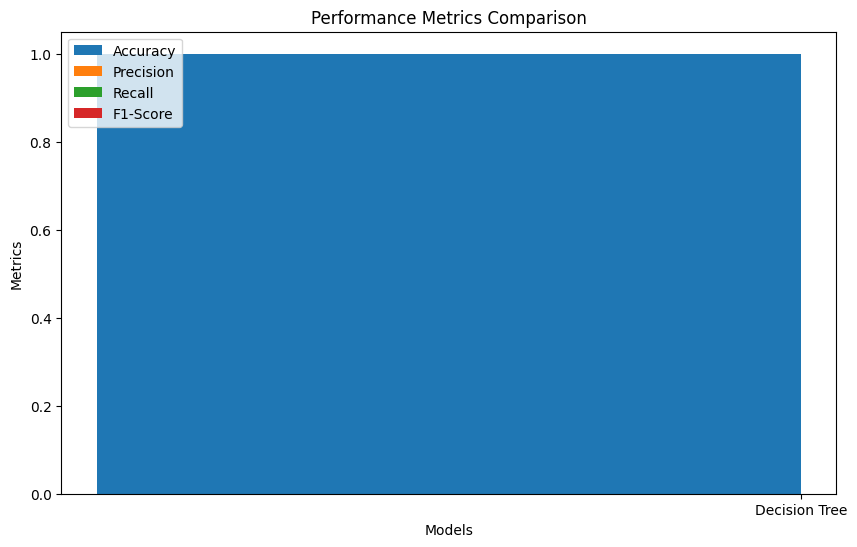

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score # Import f1_score

# Plotting bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# Calculate the F1 score and store it in a variable
f1_score_value = f1.mean()
data = [accuracy.mean(), precision.mean(), recall.mean(), f1_score_value]

# Define the models list - Replace with your actual model names
models = ['Decision Tree']  # Example: Replace with your actual model names

x = np.arange(len(models))  # X-axis locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(data):
    ax.bar(x + i * width, metric, width, label=metrics[i])

ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


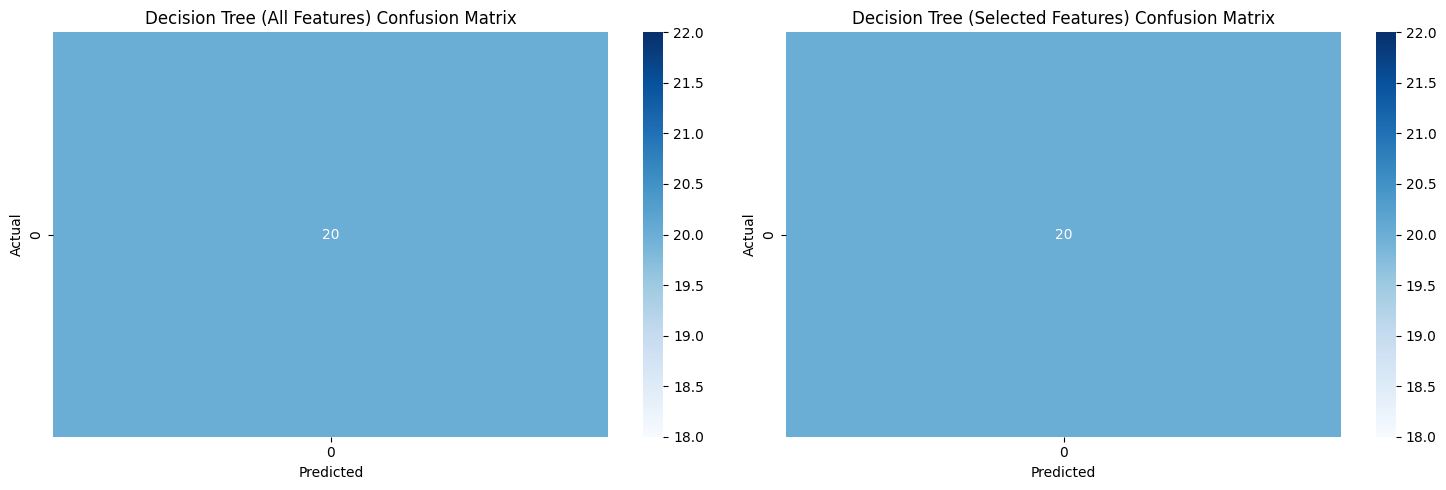

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you want to plot confusion matrices for clf_DDoS and clf_rfeDDoS
models = {
    'Decision Tree (All Features)': clf_DDoS,
    'Decision Tree (Selected Features)': clf_rfeDDoS,
}

# Create a copy of the test data to avoid modifying the original DataFrame
X_df_test_encoded = X_df_test.copy()

# Iterate through columns and encode any object (string) columns
for col in X_df_test_encoded.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each column
    le = LabelEncoder()
    # Fit the LabelEncoder on the training data to ensure consistent encoding
    le.fit(X_df_train[col])
    # Transform the column in the test data, handling unknown labels
    X_df_test_encoded[col] = X_df_test_encoded[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1) #handle unknown labels

# Assuming you want to plot confusion matrices for clf_DDoS and clf_rfeDDoS
conf_matrices = {}
for model_name, model in models.items():
    if model_name == 'Decision Tree (Selected Features)':
        # Select only the features used by clf_rfeDDoS for prediction
        selected_feature_indices = [X_df_train.columns.get_loc(col) for col in rfecolname_DDoS]
        X_df_test_encoded_selected = X_df_test_encoded.iloc[:, selected_feature_indices]
        Y_pred = model.predict(X_df_test_encoded_selected)
    else:
        Y_pred = model.predict(X_df_test_encoded)
    conf_matrices[model_name] = confusion_matrix(Y_df_test, Y_pred)


fig, axes = plt.subplots(1, len(conf_matrices), figsize=(15, 5))
for i, (model, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'{model} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()